# Sales Prediction - Supervised Learning

#**Introduction** 

This project applies supervised learning to predict sales based on product orders to support data driven decision making by using both Linear Regression and Random Forest models. 

It aims to identify patterns to forecast sales effectively in an orderly behavior.

✅ **Pain Point 1: Uncertain Sales Forecasts**
   - Problem: The Businesses struggle to predict revenue.
   - Solution: The model forecasts future sales by using past sales, product lines, pricing, and quantity e.t.c with 89% accuracy (R² = 0.89).

**✅ Pain Point 2: Inventory Challenges**
   - Problem: Overstocking or understocking impacts profit.
   - Solution: Accurate predictions using the model can help plan inventory efficiently.

**✅ Pain Point 3: No Insight into Sales Drivers**
  - Problem: It is unclear  to know what affects sales performance.
  - Solution: The model’s feature importance shows which factors (e.g., TOTAL_VALUE, PRODUCTLINE) influence sales most.


In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# --- Load and Explore Data ---
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(data.head())
print(data.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2/24/2003 0:00  Shipped       1         2     2003  ...   
1  05/07/2003 00:00  Shipped       2         5     2003  ...   
2  07/01/2003 00:00  Shipped       3         7     2003  ...   
3    8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 00:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye        

In [3]:
# --- Feature Engineering ---
# To help the model make good predictions, We selected only the useful columns (features).

data['TOTAL_VALUE'] = data['QUANTITYORDERED'] * data['PRICEEACH']

features = ['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE', 'TOTAL_VALUE']
target = 'SALES'


# --- one-hot encoding is applied to the "PRODUCTLINE and DEALSIZE" categorical variables ---
df = data[features + [target]]
df = pd.get_dummies(df, columns=['PRODUCTLINE', 'DEALSIZE'], drop_first=True)


# --- The data is splitted into training and testing ---
X = df.drop('SALES', axis=1)
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# --- Linear Regression Model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [5]:
# --- Random Forest Model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [6]:
# --- Evaluation Metrics ---
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model:")
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("R^2 Score:", r2_score(y_true, y_pred))
    print("\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

Linear Regression Model:
MSE: 520049.1991898214
MAE: 468.871403115293
R^2 Score: 0.8808562918744974


Random Forest Model:
MSE: 463594.6252482913
MAE: 325.9679897315251
R^2 Score: 0.8937900821591819




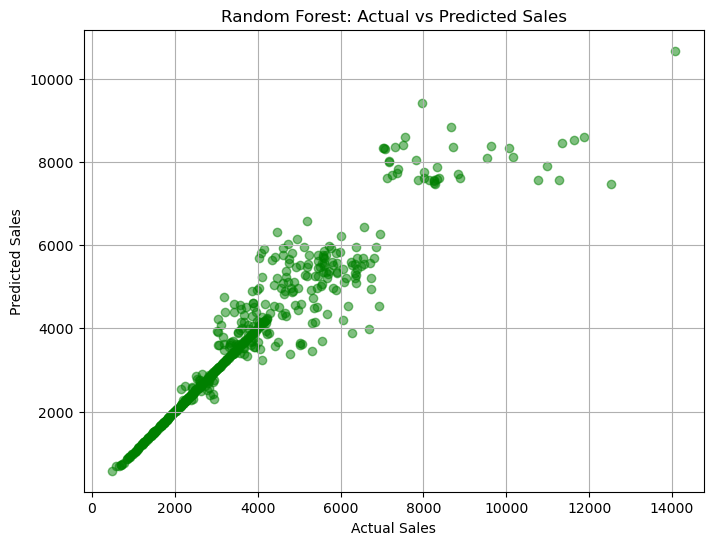

In [7]:
# --- Visualizations ---
# Actual vs Predicted Sales: Most points are close to the diagonal, that means the model is predicting well. 
 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.grid(True)
plt.show()

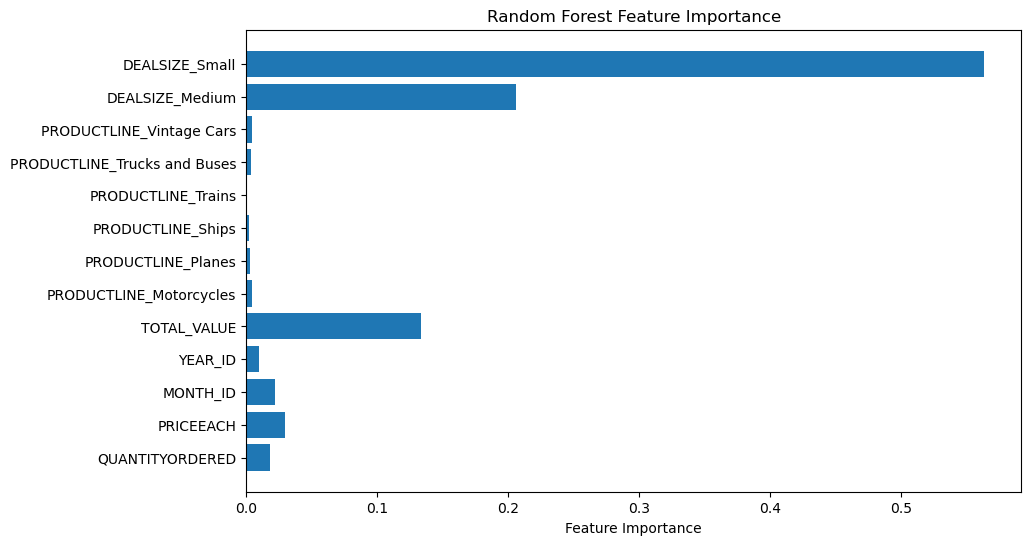

In [9]:
# Feature Importance: 
# TOTAL_VALUE is the top feature driving prediction—logical, since it directly relates to sales.

importances = rf_model.feature_importances_
features_list = X.columns
plt.figure(figsize=(10,6))
plt.barh(features_list, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

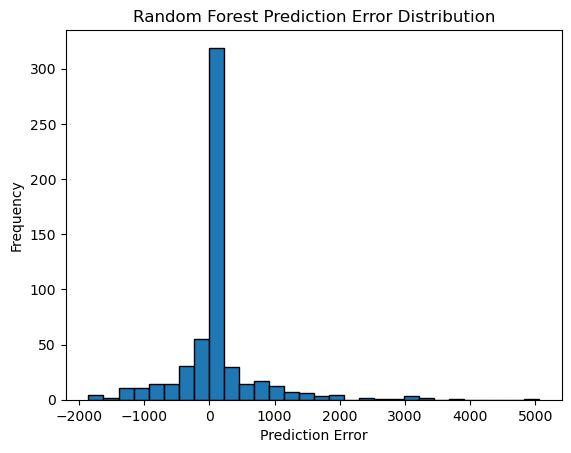

In [10]:
# Error Distribution: 
# Most errors center around zero with a slight spread, this suggests that the model is generally accurate but still has room to improve.
errors = y_test - y_pred_rf
plt.hist(errors, bins=30, edgecolor='k')
plt.title('Random Forest Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# --- Conclusion ---

#**Conclusion & Insights**

#**What Worked:**

   - The sales prediction model performs well, with Random Forest showing stronger results than Linear Regression..
   - High R² score (~0.89) means our model explains most of the sales behavior.
   - Feature importance analysis revealed that TOTAL_VALUE and product characteristics significantly drive sales.
    
#**What Could Be Improved:**

   - New features like customer information or time of day can be introduced.
   - Outliers or extreme values can be removed to improve it.
   - Advanced models like XGBoost & LightGBM can be implemented to see a better performance.
        
#**What Metrics Tell Us:**

   - R² close to 1 indicates strong prediction power.
    
In conclusion the three pain points the model solves are:
  - Sales forecasting
  - Inventory planning
  - Understanding what drives sales